# Results visualizer

In [28]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [29]:
def classifaction_report_df(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    
    row = {}
    row_data = lines[-2].split('     ')
    row['class'] = row_data[0]
    row['precision'] = float(row_data[1])
    row['recall'] = float(row_data[2])
    row['f1_score'] = float(row_data[3])
    row['support'] = float(row_data[4])
    report_data.append(row)
    
    df = pd.DataFrame.from_dict(report_data)
    return df

In [30]:
def fscore(res, row=3):
    """
    Extract the fscore from a list of classification reports.
    @param res: list of pandas.DataFrame classification report
    @param row: information to be displayed.
        0 = Negative
        1 = Neutral
        2 = Positive
        3 = Avg [Default]
    @return list of the values of the classification
    """
    return [x['f1_score'][row] for x in res]

def precision(res, row=3):
    return [x['precision'][row] for x in res]

def recall(res, row=3):
    return [x['recall'][row] for x in res]

In [31]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/3., 1.05*height,
                '%f' % height,
                ha='center', va='bottom')

In [32]:
def barplot(results_l, results_r, results_n, metric, dataset):
    N = len(results_l)
    linear = metric(results_l)
    rbf = metric(results_r)
    nb = metric(results_n)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.33       # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))

    rects1 = ax.bar(ind, linear, width, color='b')
    rects2 = ax.bar(ind + width, nb, width, color='r')
#     rects3 = ax.bar(ind + 2*width, nb, width, color='b')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_title('Scores by classifiers and processing strategies for {}'.format(dataset))
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(list(map(lambda x: 'S{}'.format(str(x)), np.arange(0, N))))

    ax.legend((rects1[0], rects2[0]), ('Linear', 'NB'))

3 classifiers -> 3 datasets -> 16 strategies -> classification report (f1-score, accuracy, ...)

In [35]:
def plot_results(file, titles):
    results = pickle.load(open(file, "rb"))
    for i in range(len(results['linear'])):
        results_l = list(map(classifaction_report_df, results['linear'][i]))
        results_r = list(map(classifaction_report_df, results['rbf'][i]))
        results_n = list(map(classifaction_report_df, results['nb'][i]))
        barplot(results_l, results_r, results_n, fscore, titles[i])
    max_value = 0.0
    for key in results.keys():
        for j in range(len(results[key])):
            for k in range(len(results[key][j])):
                cur_value = classifaction_report_df(results[key][j][k])['f1_score'][3]
                if (max_value < cur_value):
                    model = 'classifier: {}, data: {}, strategy: {}, f1_score: {}'.format(key, titles[j], k, cur_value)
                    max_value = cur_value
                    best_score = [key, j, k]
    print('FILENAME: {}\nDATASETS: {}\nBEST MODEL: {}'.format(file, titles, model))
    print(results[best_score[0]][best_score[1]][best_score[2]])


FILENAME: results-unigrams-train-sd-ap-ai-test-te10000.p
DATASETS: ['SELF-DRIVE', 'APPLE', 'AIRLINE']
BEST MODEL: classifier: linear, data: AIRLINE, strategy: 4, f1_score: 0.48
             precision    recall  f1-score   support

   negative       0.47      0.51      0.49      2143
    neutral       0.44      0.38      0.41      2143
   positive       0.52      0.55      0.53      2143

avg / total       0.48      0.48      0.48      6429



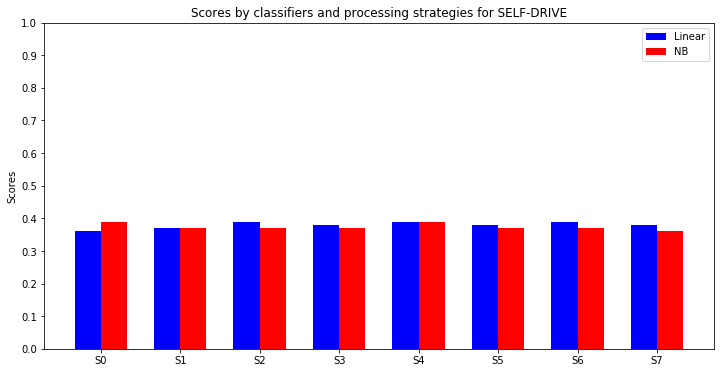

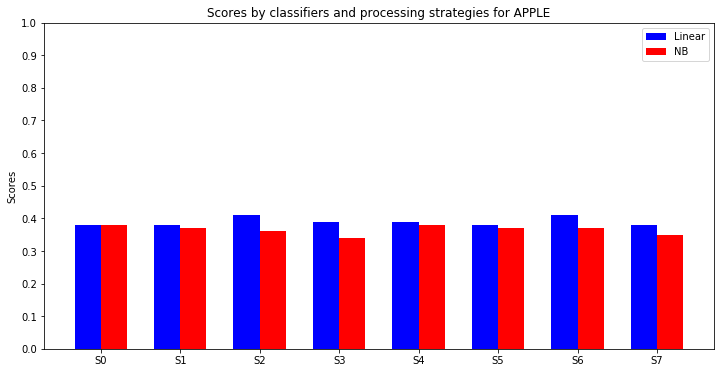

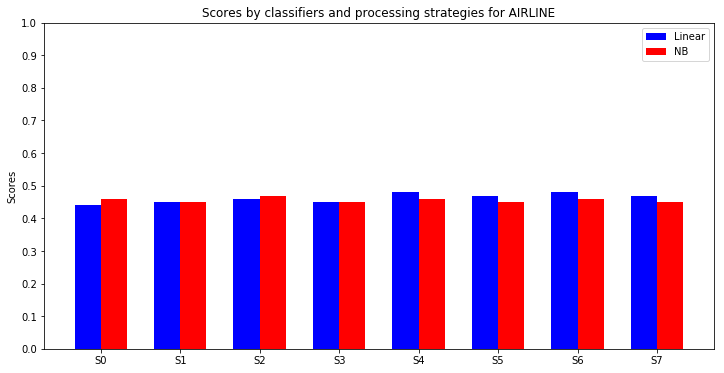

FILENAME: results_bigrams.p
DATASETS: ['SELF-DRIVE', 'APPLE', 'AIRLINE']
BEST MODEL: classifier: linear, data: AIRLINE, strategy: 12, f1_score: 0.48
             precision    recall  f1-score   support

   negative       0.48      0.53      0.50      4468
    neutral       0.46      0.34      0.39      4468
   positive       0.50      0.57      0.53      4468

avg / total       0.48      0.48      0.48     13404



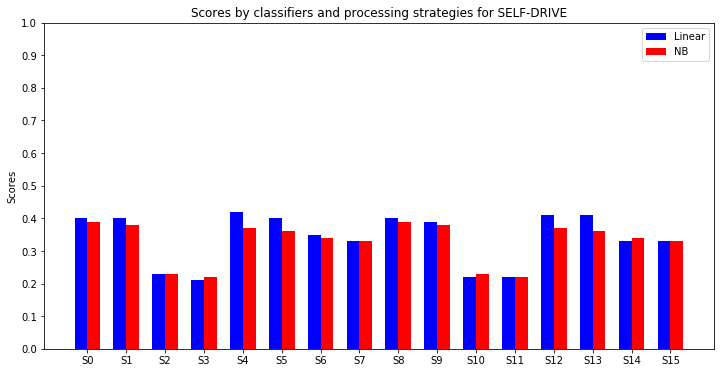

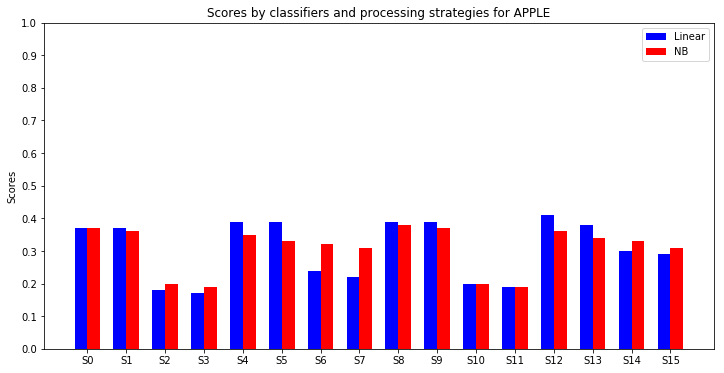

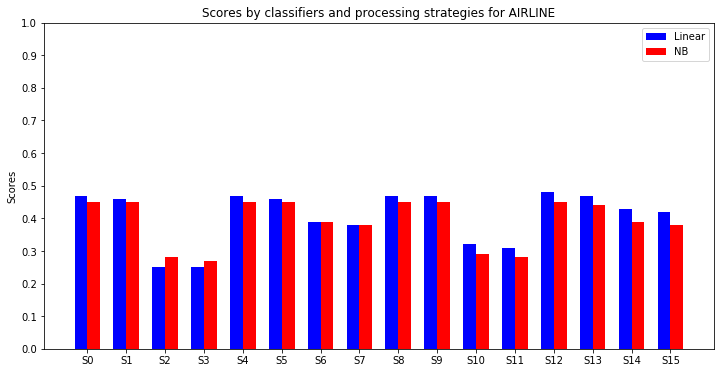

FILENAME: results_test-apple.p
DATASETS: ['SELF-DRIVE', 'TEXT-EMOTION', 'AIRLINE']
BEST MODEL: classifier: linear, data: AIRLINE, strategy: 7, f1_score: 0.6
             precision    recall  f1-score   support

   negative       0.70      0.48      0.57       423
    neutral       0.50      0.79      0.62       423
   positive       0.71      0.52      0.60       423

avg / total       0.64      0.60      0.60      1269



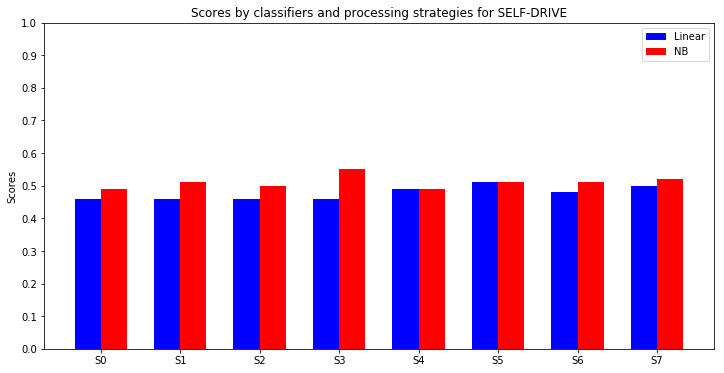

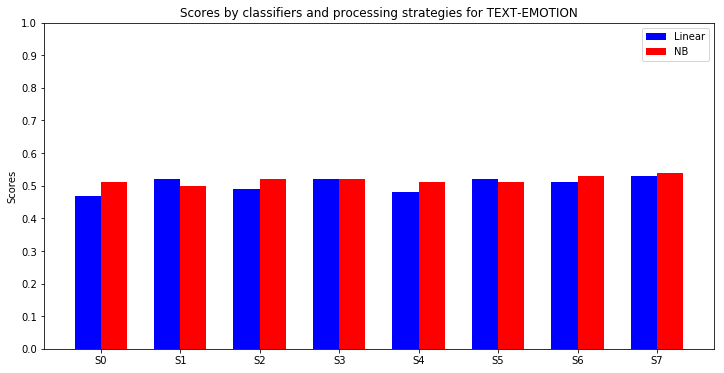

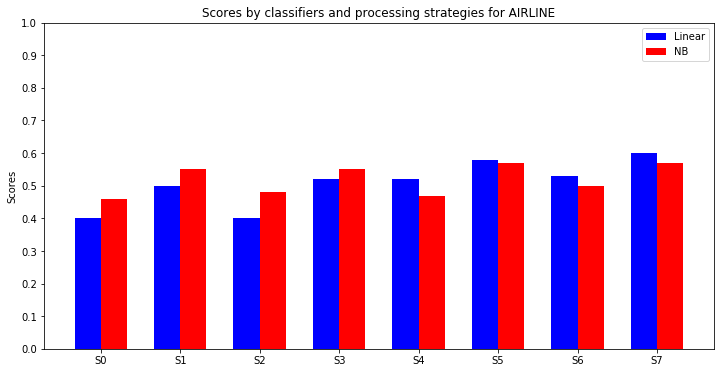

In [36]:
plot_results('results-unigrams-train-sd-ap-ai-test-te10000.p', ['SELF-DRIVE', 'APPLE', 'AIRLINE'])
plt.show()
plot_results('results_bigrams.p', ['SELF-DRIVE', 'APPLE', 'AIRLINE'])
plt.show()
plot_results('results_test-apple.p', ['SELF-DRIVE', 'TEXT-EMOTION', 'AIRLINE'])
plt.show()